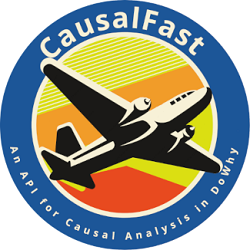
<h3>Causal Estimand Tutorials</h3><br>
Use this notebook to model the three types of causal estimand used by DoWhy<br>

***cf.makegraph() has 3 primary functions***
 1.  Make a Causal Graph DAG<br>
 2.  Make Causal Model for DoWhy/Simulator<br>
 3.  <b>Run Tutorials of DoWhy Estimand: Frontdoor, Backdoor, Instrumental Variable (IV)</b>

In [ ]:
#!pip install -i https://test.pypi.org/simple/ causalfast
import causalfast as cf
import pandas as pd
cf.__version__
#cf.makegraph()  #Run for assistance

<h3>Step 1: Load an Estimand Model using the Tutorial</h3>

In [ ]:
bdcausalmodel = cf.makegraph(function='tutorial',
                             eda=True,
                             verbose=True,
                             model='backdoor')

In [ ]:
fdcausalmodel = cf.makegraph(function='tutorial',
                             eda=False,
                             verbose=False,
                             model='frontdoor')

In [ ]:
ivcausalmodel = cf.makegraph(function='tutorial',
                             eda=False,
                             verbose=False,
                             model='iv')

<h3>Step 2: Run CausalFast Simulator using the CausalModel Object</h3>

 1.  Load Causal model:   <b>cf.simulator(causalmodel=causalmodel[0])</b><br>
 2.  Use default parameters or choose output, identifier, and estimator<br>
    - Note: The simulator will automatically select a 'good' estimator based on the estimand<br>
    - Note: Linear regression should be used only under OLS assumptions<br>
    - Note: Logistic regression (GLM and linearDRLearner) requires a binary outcome variable<br>
    - Note: Propensity scores require both binary treatment and binary outcome<br>

In [ ]:
#cf.simulator()  #Run this for assistance

In [ ]:
cf.simulator(causalmodel=bdcausalmodel[0],
             full_output=False,
             refute=True)

In [ ]:
cf.simulator(causalmodel=fdcausalmodel[0],
             full_output=False,
             refute=True)

In [ ]:
cf.simulator(causalmodel=ivcausalmodel[0],
             full_output=False,
             refute=True)